\begin{equation}
\begin{cases}
\displaystyle \frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = 0, & x \in \mathbb{R},\ t \in [0, T] \\
u(x,0) = u_0(x),
\end{cases}
\end{equation}

\begin{equation}
u_0(x) = 
\begin{cases}
1, & x \leq 0, \\
0, & x > 0.
\end{cases}
\end{equation}

The exact solution is given by:

\begin{equation}
u(x,t) = 
\begin{cases}
1, & x \leq t, \\
0, & x > t.
\end{cases}
\end{equation}


In [38]:
import numpy as np
import matplotlib.pyplot as plt

def Upwind(u0, T, l, r, Nx, Nt, a, boundary='Dirichlet', u_left=0, u_right=0):
    x = np.linspace(l, r, Nx+1)
    k = T / Nt
    h = (r - l) / Nx
    lam = k / h
    u = u0(x)
    for _ in range(Nt):
        un = u.copy()
        u[1:] = un[1:] - a * lam * (un[1:] - un[:-1])
        if boundary == 'Dirichlet':
            u[0] = u_left
            u[-1] = u_right
    return u

def Lax_Wendroff(u0, T, l, r, Nx, Nt, a, boundary='Dirichlet', u_left=0, u_right=0):
    x = np.linspace(l, r, Nx+1)
    k = T / Nt
    h = (r - l) / Nx
    lam = k / h
    u = u0(x)
    for _ in range(Nt-1):
        u[1:-1] = u[1:-1] - a * lam * (u[2:] - u[:-2]) / 2 + a**2 * lam**2 * (u[2:] - 2 * u[1:-1] + u[:-2]) / 2
        if boundary == 'Dirichlet':
            u[0] = u_left
            u[-1] = u_right
    return u

def Leap_Frog(u0, T, l, r, Nx, Nt, a, boundary='Dirichlet', u_left=0, u_right=0):
    x = np.linspace(l, r, Nx+1)
    k = T / Nt
    h = (r - l) / Nx
    lam = k / h
    u_pred = u0(x)
    u = u_pred.copy()
    u[1:] = u[1:] - a * lam * (u[1:] - u[:-1])
    if boundary == 'Dirichlet':
        u[0] = u_left
        u[-1] = u_right
    for _ in range(Nt-2):
        temp = u.copy()
        u[1:-1]= u_pred[1:-1]-a*lam*(u[2:]-u[:-2])
        u_pred = temp.copy()
        if boundary == 'Dirichlet':
            u[0] = u_left
            u[-1] = u_right
    return u

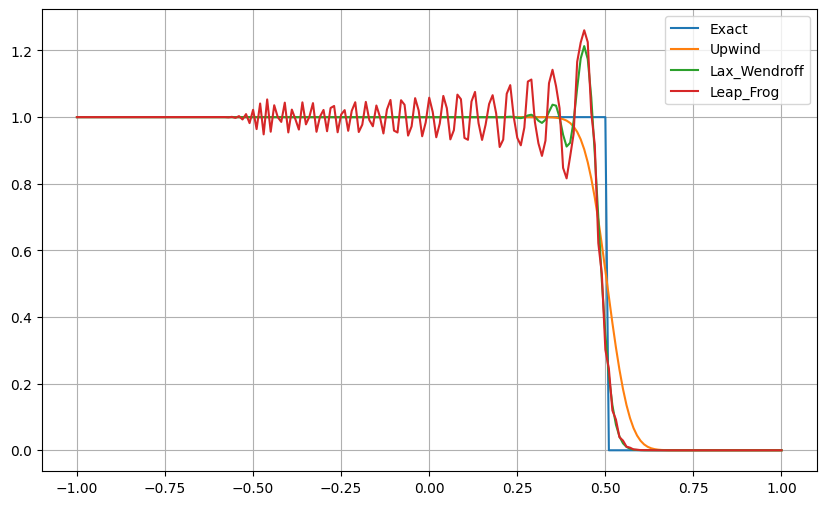

In [39]:
# Define the initial condition
def u0(x):
    return np.where(x <= 0, 1.0, 0.0)

def exact_solution(x, t):
    return np.where(x <= t, 1.0, 0.0)

T = 0.5
Nx = 200
l, r = -1, 1
a = 1
Nt = 100
method = {
    'Upwind': Upwind,
    'Lax_Wendroff': Lax_Wendroff,
    'Leap_Frog': Leap_Frog
}

x = np.linspace(l, r, Nx+1)
plt.figure(figsize=(10, 6))
plt.plot(x, exact_solution(x, T), label='Exact')
for method_name, method_func in method.items():
    u = method_func(u0, T, l, r, Nx, Nt, a, boundary='Dirichlet', u_left=1, u_right=0)
    plt.plot(x, u, label=method_name)
plt.grid()
plt.legend()
plt.show()
